# Collaboration and Competition
---

Project 3 - [Udacity Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)

### 1. Start the Environment

Importing necessary packages.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import os
import pandas as pd
import torch
from util import DDPG_AGENT, PrioritizedReplayBuffer, UniformReplayBuffer, set_all_fontsizes
from collections import deque
import matplotlib.pyplot as plt

### 2. Set the correct path to Unity environment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are running on Linux, then you downloaded `Tennis.x86` and `Tennis.x86_64`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env_path_n_file_name = "Tennis.x86_64"
```

In [2]:
env_path_n_file_name = "Tennis_Linux/Tennis.x86_64"

### 3. Choose between TRAIN or ANALYSIS ONLY
If the `train` variable below is set to True, the training loop begins. If set to False the notebook only evaluates the cells related to analysis of results. With this way of hindering training, one can just restart and rerun entire notebook when in analysis mode if needed, instead of evaluating cell by cell.

train = False

In [3]:
train = True

### 4. Train

In [5]:
if train:
    num_agents = 2
    SEED=7

    # Set memory type
    mem_type = 'prioritizedreplay' # 'uniformreplay'
    if mem_type=='prioritizedreplay':
        the_mem = PrioritizedReplayBuffer
    else:
        the_mem = UniformReplayBuffer

    agent = DDPG_AGENT(state_size=24, action_size=2, random_seed=SEED, memory=the_mem)
    env = UnityEnvironment(file_name=env_path_n_file_name)
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    def run_ddpg(n_episodes=2000):
        scores_deque = deque(maxlen=100)
        scores = []
        for i_episode in range(1, n_episodes + 1):
            env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
            state = env_info.vector_observations  # get the current state (for each agent)
            score = np.zeros(num_agents)  # initialize the score (for each agent)
            agent.reset()
            while True:
                action = agent.act(state)  # select an action (for each agent)
                env_info = env.step(action)[brain_name]  # send all actions to tne environment
                next_state = env_info.vector_observations  # get next state (for each agent)
                reward = env_info.rewards  # get reward (for each agent)
                done = env_info.local_done  # see if episode finished
                for state_, action_, reward_, next_state_, done_ in zip(state, action, reward, next_state, done):
                    agent.step(state_, action_, reward_, next_state_, done_)  # add events to experience and maybe learn
                score += reward  # update the score (for each agent)
                state = next_state  # roll over states to next time step

                if np.any(done):  # exit loop if episode finished
                    break

            scores_deque.append(score)
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(np.max(scores_deque,axis=1)), np.max(score)), end="")
            if i_episode % 10 == 0:
                torch.save(agent.actor_local.state_dict(), 'checkpoints/checkpoint_actor_{0}_{1}.pth'.format(mem_type,i_episode))
                torch.save(agent.critic_local.state_dict(),'checkpoints/checkpoint_critic_{0}_{1}.pth'.format(mem_type,i_episode))
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(np.max(scores_deque,axis=1))))
        return scores


    scores = run_ddpg(n_episodes=500)
    pd.DataFrame(scores).to_csv(os.path.join('results', 'scores_{0}.csv'.format(mem_type)), index=False)
    env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Episode 10	Average Score: 0.01	Score: 0.00
Episode 20	Average Score: 0.00	Score: 0.00
Episode 30	Average Score: 0.00	Score: 0.00
Episode 40	Average Score: 0.00	Score: 0.00
Episode 50	Average Score: 0.00	Score: 0.00
Episode 60	Average Score: 0.01	Score: 0.00
Episode 70	Average Score: 0.01	Score: 0.00
Episode 80	Average Score: 0.01	Score: 0.00
Episode 90	Average Score: 0.01	Score: 0.00
Episode 100	Average Score: 0.01	Score: 0.10
Episode 110	Average Score: 0.02	Score: 0.10
Episode 111	Average Score: 0.03	Score: 0.20

/media/peter/DRIVE2/Code/PycharmProjects/deep-reinforcement-learning/p3_collab-compet/util.py:496: UserWarning: Prioritized Replay returned 1 problematic samples
  warnings.warn('Prioritized Replay returned {0} problematic samples'.format(num_errors))


Episode 120	Average Score: 0.04	Score: 0.10
Episode 130	Average Score: 0.05	Score: 0.30
Episode 140	Average Score: 0.06	Score: 0.10
Episode 150	Average Score: 0.08	Score: 0.40
Episode 160	Average Score: 0.09	Score: 0.09
Episode 170	Average Score: 0.11	Score: 0.20
Episode 180	Average Score: 0.12	Score: 0.10
Episode 190	Average Score: 0.14	Score: 0.50
Episode 200	Average Score: 0.16	Score: 0.40
Episode 210	Average Score: 0.18	Score: 0.20
Episode 220	Average Score: 0.19	Score: 0.10
Episode 230	Average Score: 0.20	Score: 0.90
Episode 240	Average Score: 0.27	Score: 1.60
Episode 250	Average Score: 0.34	Score: 1.50
Episode 260	Average Score: 0.38	Score: 0.10
Episode 270	Average Score: 0.44	Score: 0.00
Episode 280	Average Score: 0.47	Score: 1.00
Episode 290	Average Score: 0.49	Score: 0.10
Episode 300	Average Score: 0.50	Score: 1.40
Episode 310	Average Score: 0.51	Score: 1.50
Episode 320	Average Score: 0.53	Score: 0.40
Episode 330	Average Score: 0.58	Score: 0.40
Episode 340	Average Score: 0.58	

### 5. Analyse Results

Plots of both raw and rolling mean of scores. An accepted solution has a rolling mean score of 30.

In [5]:
scores_prioritized = pd.read_csv(os.path.join('results','scores_prioritizedreplay.csv'))
scores_uniform = pd.read_csv(os.path.join('results','scores_uniformreplay.csv'))

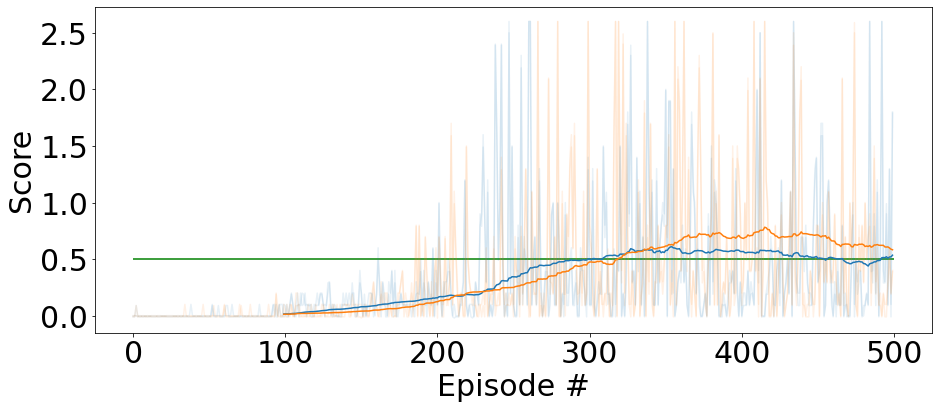

In [6]:
ax = pd.DataFrame(scores_prioritized).plot(figsize=(15, 6), color='C0', alpha=0.1)
ax1 = pd.DataFrame(scores_uniform).plot(ax=ax, color='C1', alpha=0.1)
mean_score_prioritized = pd.DataFrame(scores_prioritized).max(axis=1)
ax2 = mean_score_prioritized.rolling(window=100).mean().plot(ax=ax, color='C0')

mean_score_uniform = pd.DataFrame(scores_uniform).max(axis=1)
ax3 = mean_score_uniform.rolling(window=100).mean().plot(ax=ax, color='C1')

ax.get_legend().remove()
ax4 = ax.hlines(0.5, 0, len(scores_prioritized), color='g')
plt.ylabel('Score')
plt.xlabel('Episode #')
set_all_fontsizes(ax, 30, False)
#plt.savefig('both_memory_types', bbox_inches = 'tight')

### 6. Play game with SMART agent

Load a check point from training above, and see how it performs. Set i_episode to desired number of training episodes. The training loop above dumps state for every 10th episodes by default.

In [7]:
# Load the saved weights into Pytorch model
SEED = 7
num_agents = 2
agent = DDPG_AGENT(state_size=24, action_size=2, random_seed=SEED)
agent.actor_local.load_state_dict(torch.load('checkpoints/checkpoint_actor_prioritizedreplay_400.pth', map_location='cpu'))
env = UnityEnvironment(file_name=env_path_n_file_name)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                        # select actions from loaded model agent
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
    
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Total score (averaged over agents) this episode: 0.1450000023469329
Total score (averaged over agents) this episode: 1.145000017248094
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 0.44500000681728125
Total score (averaged over agents) this episode: -0.004999999888241291
